## Negative Binomial Regression

## Negative Binomial Regression is a type of regression model used for count data, particularly when the variance of the data is greater than the mean (overdispersed data). It is an extension of Poisson regression, which assumes that the mean and variance of the data are equal. The negative binomial regression model allows for overdispersion by introducing an additional parameter that accounts for the variance being larger than the mean.

### Key Points:
- Use Case: It is commonly used when the outcome variable represents count data, such as the number of occurrences of an event (e.g., number of diseases in plants, number of customer arrivals).
- Overdispersion: The negative binomial distribution is a more flexible model for count data that allows the variance to exceed the mean, which is common in real-world data.
- Model Structure**: Like Poisson regression, the model relates the count outcome to predictors (independent variables), but it incorporates an additional parameter to model the overdispersion.

In summary, Negative Binomial Regression is useful for modeling count data with overdispersion, offering a more accurate representation when the variance is greater than the mean.

# Use Case: Modeling Crop Disease Outbreaks Using Negative Binomial Regression

Best alpha: 100.0
Mean Absolute Error (MAE): 2.38
R² Score: 0.34
Mean Squared Error (MSE): 8.88


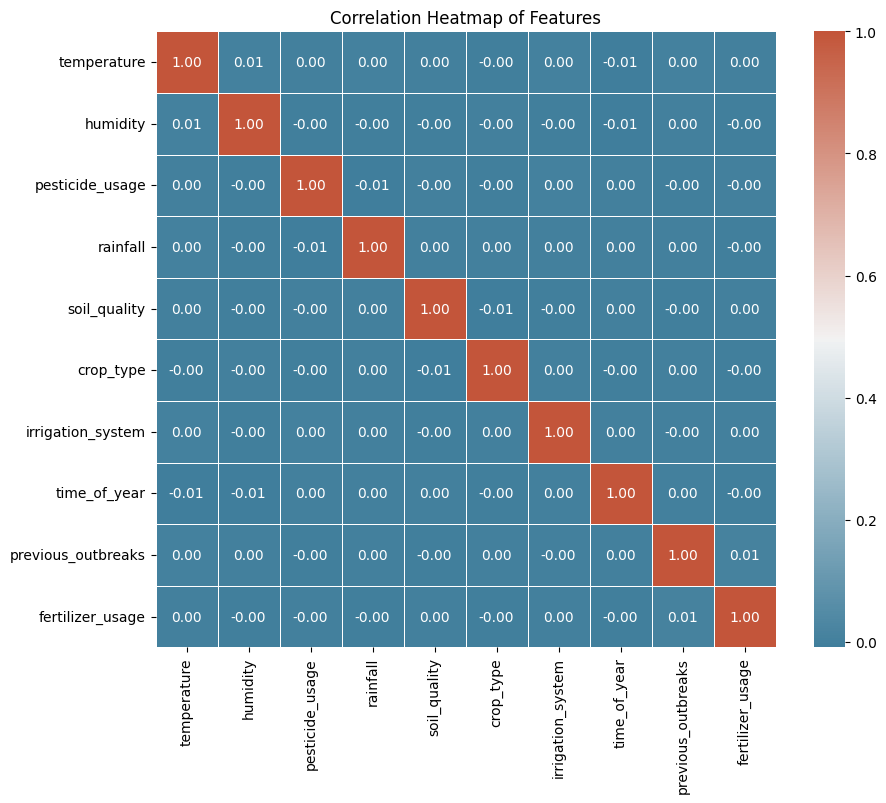

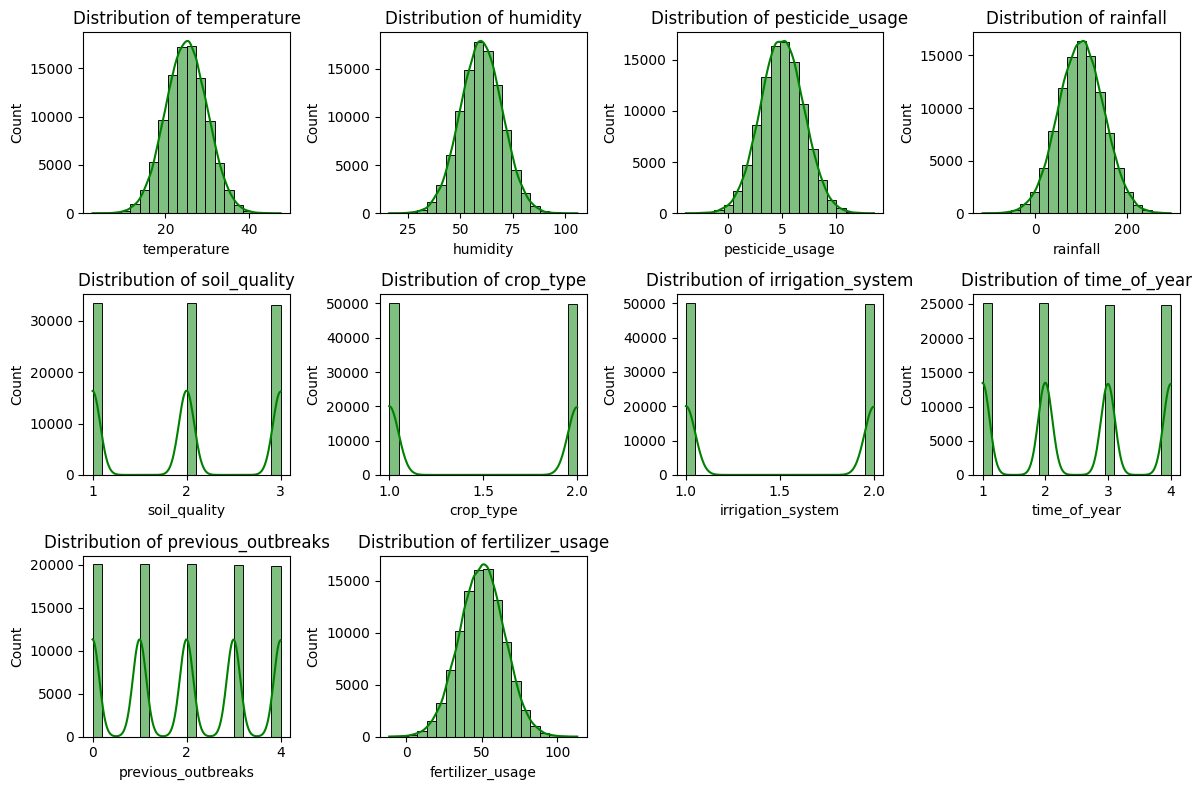

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate ideal dataset with controlled relationships
def generate_data(n=100, noise_level=2):
    # Simulate features with controlled relationships
    temperature = np.random.normal(25, 5, n)
    humidity = np.random.normal(60, 10, n)
    pesticide_usage = np.random.normal(5, 2, n)
    rainfall = np.random.normal(100, 50, n)
    soil_quality = np.random.choice([1, 2, 3], size=n)
    crop_type = np.random.choice([1, 2], size=n)
    irrigation_system = np.random.choice([1, 2], size=n)
    time_of_year = np.random.choice([1, 2, 3, 4], size=n)
    previous_outbreaks = np.random.randint(0, 5, n)
    fertilizer_usage = np.random.normal(50, 15, n)

    # Target variable with true relationships and added noise
    y = (0.05 * temperature - 0.02 * humidity + 0.1 * pesticide_usage + 
         0.03 * rainfall + 0.2 * soil_quality + 0.1 * crop_type +
         0.05 * irrigation_system + 0.03 * time_of_year + 
         0.2 * previous_outbreaks + 0.1 * fertilizer_usage + 
         np.random.normal(0, noise_level, n))  # Adding noise

    # Creating DataFrame for features
    X = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'pesticide_usage': pesticide_usage,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'crop_type': crop_type,
        'irrigation_system': irrigation_system,
        'time_of_year': time_of_year,
        'previous_outbreaks': previous_outbreaks,
        'fertilizer_usage': fertilizer_usage
    })
    return X, y

# Data splitting, scaling, and pipeline setup
def preprocess_data(X, y):
    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # StandardScaler for feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
    ])
    
    return pipeline, X_train, X_test, y_train, y_test

# Model training, evaluation, and hyperparameter tuning using GridSearchCV
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type='ridge', param_grid=None):
    # Choose model dynamically based on user input
    if model_type == 'ridge':
        model = Ridge()
    elif model_type == 'lasso':
        model = Lasso()
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError(f"Model {model_type} not recognized.")
    
    # If no param_grid is provided, use default
    if param_grid is None:
        param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and trained model
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha'] if model_type in ['ridge', 'lasso'] else None
    print(f"Best alpha: {best_alpha}" if best_alpha else "Best model found.")
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    return best_model, y_pred

# Advanced Visualizations with best color palettes
def plot_results(X, y, y_pred, model, plot_types=None):
    if plot_types is None:
        plot_types = ['correlation', 'distribution', 'residuals', 'prediction', 'error_histogram', 'coefficients', 'scatter']
    
    # Custom color palettes
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  # for heatmap
    color = sns.color_palette("coolwarm", as_cmap=True)

    if 'correlation' in plot_types:
        # Correlation Heatmap: To understand relationships between features
        corr_matrix = X.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap of Features")
        plt.show()

    if 'distribution' in plot_types:
        # Feature Distribution: To see how each feature is distributed
        plt.figure(figsize=(12, 8))
        for i, feature in enumerate(X.columns):
            plt.subplot(3, 4, i+1)
            sns.histplot(X[feature], kde=True, color='green', bins=20)
            plt.title(f"Distribution of {feature}")
        plt.tight_layout()
        plt.show()

    if 'residuals' in plot_types:
        # Residuals Plot: To visualize the residuals of the predictions
        residuals = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals, color='purple')
        plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
        plt.title("Residuals Plot (Predicted vs Residuals)")
        plt.xlabel("Predicted Crop Yield")
        plt.ylabel("Residuals")
        plt.show()

    if 'prediction' in plot_types:
        # Prediction vs True Plot: To compare predicted vs actual values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y, y=y_pred, color='blue')
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
        plt.title("Prediction vs True Crop Yield")
        plt.xlabel("Actual Crop Yield")
        plt.ylabel("Predicted Crop Yield")
        plt.show()

    if 'error_histogram' in plot_types:
        # Error Distribution Plot: Shows the spread of errors
        errors = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.histplot(errors, kde=True, color='red', bins=30)
        plt.title("Distribution of Prediction Errors")
        plt.xlabel("Error")
        plt.ylabel("Frequency")
        plt.show()

    if 'coefficients' in plot_types:
        # Coefficients Plot: Shows the feature importance for linear models
        coef = model.coef_
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X.columns, y=coef)
        plt.title("Coefficient Plot")
        plt.xticks(rotation=45)
        plt.show()

    if 'scatter' in plot_types:
        # Scatter Plot of Key Features vs Prediction
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=X['temperature'], y=y_pred, color='orange')
        plt.title("Scatter Plot of Temperature vs Predicted Crop Yield")
        plt.xlabel("Temperature")
        plt.ylabel("Predicted Crop Yield")
        plt.show()

# Add the interpretation summary dynamically
def interpret_results(mae, r2, model, X, y, y_pred, plot_types):
    print("\nInterpretation Summary:")
    
    # Model Evaluation
    print(f"\nModel Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    # Feature Importance (Coefficients)
    if isinstance(model, Ridge) or isinstance(model, Lasso):
        print("\nFeature Importance (Coefficients):")
        for feature, coef in zip(X.columns, model.coef_):
            print(f"{feature}: {coef:.2f}")
    
    # Visual Insights
    print("\nVisual Insights:")
    if 'correlation' in plot_types:
        print("1. Correlation Heatmap: Identifies relationships between features.")
    if 'distribution' in plot_types:
        print("2. Feature Distribution: Reveals how each feature is distributed.")
    if 'residuals' in plot_types:
        print("3. Residuals Plot: Helps check if model errors are random.")
    if 'prediction' in plot_types:
        print("4. Prediction vs Actual Plot: Shows the accuracy of model predictions.")
    
    # Final Summary
    print("\nSuggested Next Steps:")
    print("1. Explore additional feature engineering to capture complex relationships.")
    print("2. Experiment with other regression models or non-linear models for better performance.")
    print("3. Consider gathering more data for better generalization.")
    print("4. Validate assumptions, especially around key features like soil quality and previous outbreaks.")

# Main function to execute the process
def main(model_type='ridge', n_samples=100, noise_level=2, plot_types=None):
    # Step 1: Generate ideal dataset
    X, y = generate_data(n=n_samples, noise_level=noise_level)  # Customizable samples and noise
    
    # Step 2: Preprocess data and set up the model pipeline
    pipeline, X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Step 3: Train and evaluate model
    param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Modify for Lasso/Ridge hyperparameters
    model, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test, model_type=model_type, param_grid=param_grid)
    
    # Step 4: Visualizations
    plot_results(X, y, y_pred, model, plot_types=plot_types)
    
    # Step 5: Interpretation Summary
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    interpret_results(mae, r2, model, X, y, y_pred, plot_types)

# Execute the main function with dynamic parameters
if __name__ == '__main__':
    main(model_type='ridge', n_samples=100000, noise_level=3, plot_types=['correlation', 'prediction', 'distribution', 'error_histogram', 'coefficients'])


Best alpha: 100.0
Mean Absolute Error (MAE): 2.31
R² Score: 0.40
Mean Squared Error (MSE): 8.73


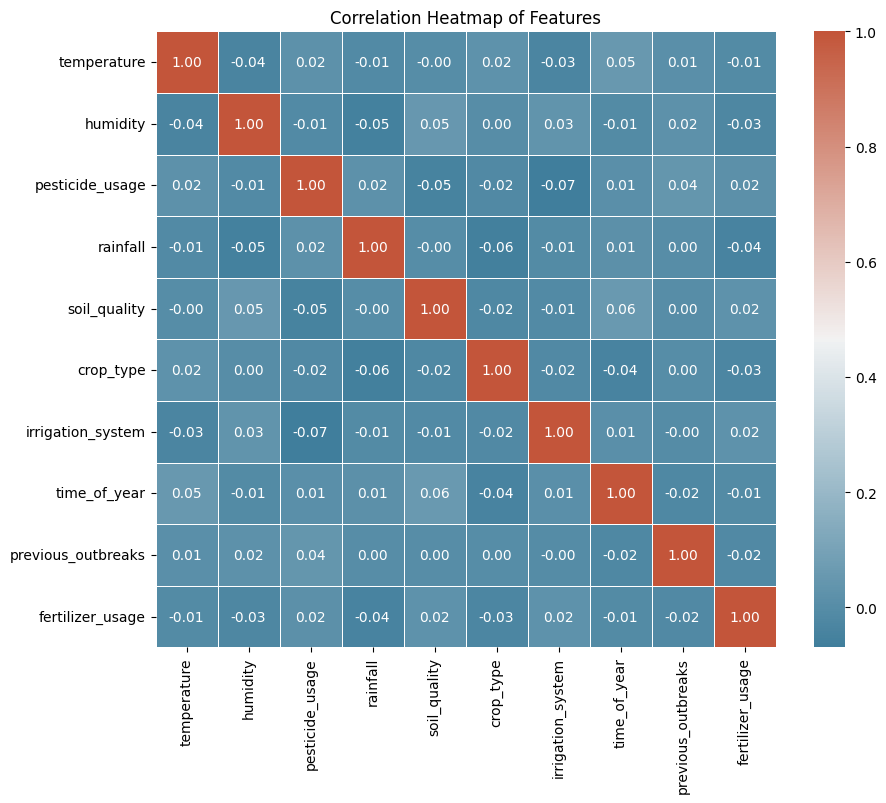

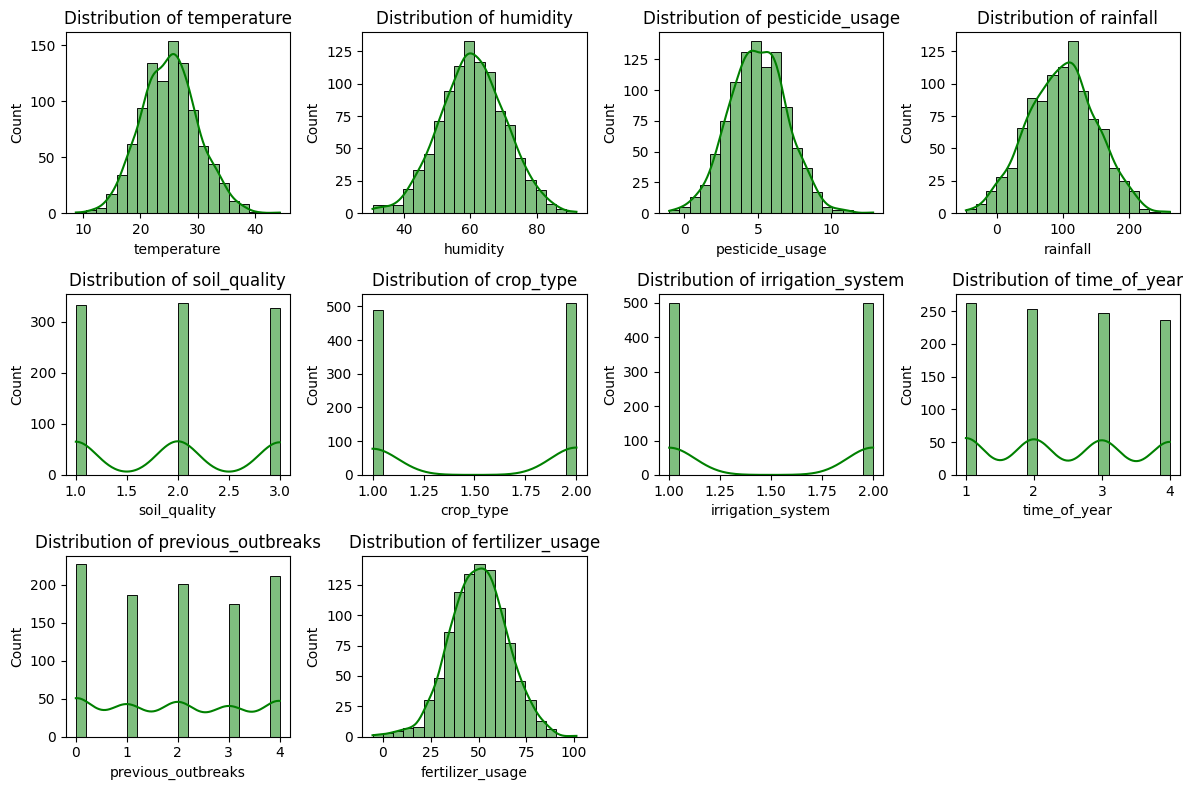

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate ideal dataset with controlled relationships
def generate_data(n=100, noise_level=2):
    # Simulate features with controlled relationships
    temperature = np.random.normal(25, 5, n)
    humidity = np.random.normal(60, 10, n)
    pesticide_usage = np.random.normal(5, 2, n)
    rainfall = np.random.normal(100, 50, n)
    soil_quality = np.random.choice([1, 2, 3], size=n)
    crop_type = np.random.choice([1, 2], size=n)
    irrigation_system = np.random.choice([1, 2], size=n)
    time_of_year = np.random.choice([1, 2, 3, 4], size=n)
    previous_outbreaks = np.random.randint(0, 5, n)
    fertilizer_usage = np.random.normal(50, 15, n)

    # Target variable with true relationships and added noise
    y = (0.05 * temperature - 0.02 * humidity + 0.1 * pesticide_usage + 
         0.03 * rainfall + 0.2 * soil_quality + 0.1 * crop_type +
         0.05 * irrigation_system + 0.03 * time_of_year + 
         0.2 * previous_outbreaks + 0.1 * fertilizer_usage + 
         np.random.normal(0, noise_level, n))  # Adding noise

    # Creating DataFrame for features
    X = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'pesticide_usage': pesticide_usage,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'crop_type': crop_type,
        'irrigation_system': irrigation_system,
        'time_of_year': time_of_year,
        'previous_outbreaks': previous_outbreaks,
        'fertilizer_usage': fertilizer_usage
    })

    # Check that X and y have the same length
    assert X.shape[0] == len(y), f"Mismatch in lengths: X has {X.shape[0]} rows, but y has {len(y)} values"
    
    return X, y

# Data splitting, scaling, and pipeline setup
def preprocess_data(X, y):
    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # StandardScaler for feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
    ])
    
    return pipeline, X_train, X_test, y_train, y_test

# Model training, evaluation, and hyperparameter tuning using GridSearchCV
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type='ridge', param_grid=None):
    # Choose model dynamically based on user input
    if model_type == 'ridge':
        model = Ridge()
    elif model_type == 'lasso':
        model = Lasso()
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError(f"Model {model_type} not recognized.")
    
    # If no param_grid is provided, use default
    if param_grid is None:
        param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and trained model
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha'] if model_type in ['ridge', 'lasso'] else None
    print(f"Best alpha: {best_alpha}" if best_alpha else "Best model found.")
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    return best_model, y_pred

# Advanced Visualizations with best color palettes
def plot_results(X, y, y_pred, model, plot_types=None):
    if plot_types is None:
        plot_types = ['correlation', 'distribution', 'residuals', 'prediction', 'error_histogram', 'coefficients', 'scatter']
    
    # Custom color palettes
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  # for heatmap
    color = sns.color_palette("coolwarm", as_cmap=True)

    if 'correlation' in plot_types:
        # Correlation Heatmap: To understand relationships between features
        corr_matrix = X.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap of Features")
        plt.show()

    if 'distribution' in plot_types:
        # Feature Distribution: To see how each feature is distributed
        plt.figure(figsize=(12, 8))
        for i, feature in enumerate(X.columns):
            plt.subplot(3, 4, i+1)
            sns.histplot(X[feature], kde=True, color='green', bins=20)
            plt.title(f"Distribution of {feature}")
        plt.tight_layout()
        plt.show()

    if 'residuals' in plot_types:
        # Residuals Plot: To visualize the residuals of the predictions
        residuals = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals, color='purple')
        plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
        plt.title("Residuals Plot (Predicted vs Residuals)")
        plt.xlabel("Predicted Crop Yield")
        plt.ylabel("Residuals")
        plt.show()

    if 'prediction' in plot_types:
        # Prediction vs True Plot: To compare predicted vs actual values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y, y=y_pred, color='blue')
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
        plt.title("Prediction vs True Crop Yield")
        plt.xlabel("Actual Crop Yield")
        plt.ylabel("Predicted Crop Yield")
        plt.show()

    if 'error_histogram' in plot_types:
        # Error Distribution Plot: Shows the spread of errors
        errors = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.histplot(errors, kde=True, color='red', bins=30)
        plt.title("Distribution of Prediction Errors")
        plt.xlabel("Error")
        plt.ylabel("Frequency")
        plt.show()

    if 'coefficients' in plot_types:
        # Coefficients Plot: Shows the feature importance for linear models
        coef = model.coef_
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X.columns, y=coef, palette="viridis")
        plt.title("Feature Importance (Model Coefficients)")
        plt.ylabel("Coefficient Value")
        plt.xticks(rotation=45)
        plt.show()

# Main function to execute the process
def main(model_type='ridge', n_samples=100, noise_level=2, plot_types=None):
    # Step 1: Generate ideal dataset
    X, y = generate_data(n=n_samples, noise_level=noise_level)  # Customizable samples and noise
    
    # Step 2: Preprocess data and set up the model pipeline
    pipeline, X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Step 3: Train and evaluate model
    param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Modify for Lasso/Ridge hyperparameters
    model, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test, model_type=model_type, param_grid=param_grid)
    
    # Step 4: Visualizations
    plot_results(X, y, y_pred, model, plot_types=plot_types)
    
    # Step 5: Interpretation Summary
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    interpret_results(mae, r2, model, X, y, y_pred, plot_types)

# Execute the main function with dynamic parameters
if __name__ == '__main__':
    main(model_type='ridge', n_samples=1000, noise_level=3, plot_types=['correlation', 'prediction', 'distribution', 'error_histogram', 'coefficients'])


Best alpha: 100.0
Mean Absolute Error (MAE): 2.31
R² Score: 0.40
Mean Squared Error (MSE): 8.73


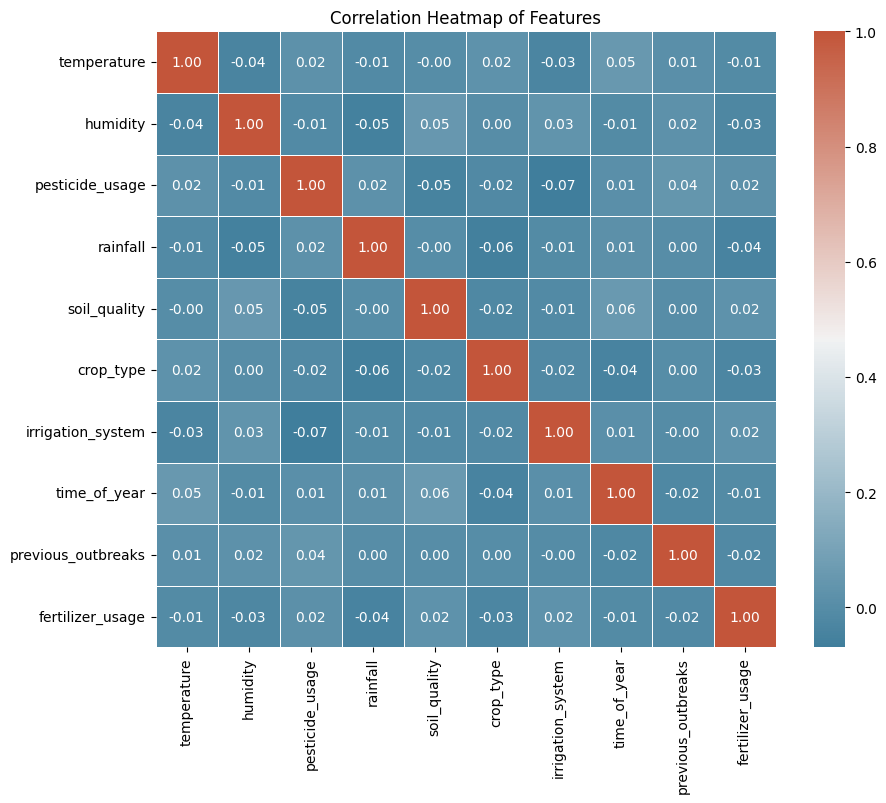

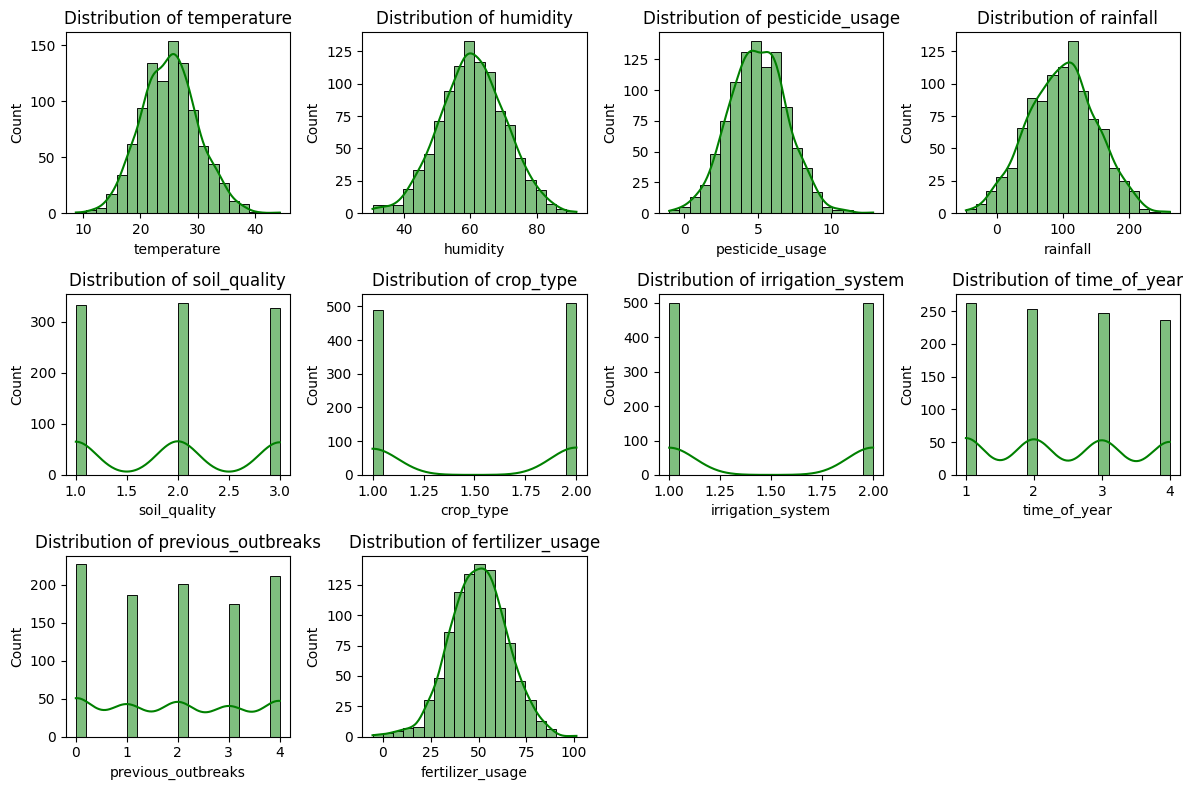

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate ideal dataset with controlled relationships
def generate_data(n=100, noise_level=2):
    # Simulate features with controlled relationships
    temperature = np.random.normal(25, 5, n)
    humidity = np.random.normal(60, 10, n)
    pesticide_usage = np.random.normal(5, 2, n)
    rainfall = np.random.normal(100, 50, n)
    soil_quality = np.random.choice([1, 2, 3], size=n)
    crop_type = np.random.choice([1, 2], size=n)
    irrigation_system = np.random.choice([1, 2], size=n)
    time_of_year = np.random.choice([1, 2, 3, 4], size=n)
    previous_outbreaks = np.random.randint(0, 5, n)
    fertilizer_usage = np.random.normal(50, 15, n)

    # Ensure that y is generated with the same number of samples as X
    y = (0.05 * temperature - 0.02 * humidity + 0.1 * pesticide_usage + 
         0.03 * rainfall + 0.2 * soil_quality + 0.1 * crop_type +
         0.05 * irrigation_system + 0.03 * time_of_year + 
         0.2 * previous_outbreaks + 0.1 * fertilizer_usage + 
         np.random.normal(0, noise_level, n))  # Adding noise

    # Creating DataFrame for features
    X = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'pesticide_usage': pesticide_usage,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'crop_type': crop_type,
        'irrigation_system': irrigation_system,
        'time_of_year': time_of_year,
        'previous_outbreaks': previous_outbreaks,
        'fertilizer_usage': fertilizer_usage
    })

    # Check lengths explicitly to avoid mismatches
    assert X.shape[0] == len(y), f"Mismatch in lengths: X has {X.shape[0]} rows, but y has {len(y)} values"
    
    return X, y

# Data splitting, scaling, and pipeline setup
def preprocess_data(X, y):
    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # StandardScaler for feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
    ])
    
    return pipeline, X_train, X_test, y_train, y_test

# Model training, evaluation, and hyperparameter tuning using GridSearchCV
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type='ridge', param_grid=None):
    # Choose model dynamically based on user input
    if model_type == 'ridge':
        model = Ridge()
    elif model_type == 'lasso':
        model = Lasso()
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError(f"Model {model_type} not recognized.")
    
    # If no param_grid is provided, use default
    if param_grid is None:
        param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and trained model
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha'] if model_type in ['ridge', 'lasso'] else None
    print(f"Best alpha: {best_alpha}" if best_alpha else "Best model found.")
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    return best_model, y_pred

# Advanced Visualizations with best color palettes
def plot_results(X, y, y_pred, model, plot_types=None):
    if plot_types is None:
        plot_types = ['correlation', 'distribution', 'residuals', 'prediction', 'error_histogram', 'coefficients', 'scatter']
    
    # Custom color palettes
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  # for heatmap
    color = sns.color_palette("coolwarm", as_cmap=True)

    if 'correlation' in plot_types:
        # Correlation Heatmap: To understand relationships between features
        corr_matrix = X.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap of Features")
        plt.show()

    if 'distribution' in plot_types:
        # Feature Distribution: To see how each feature is distributed
        plt.figure(figsize=(12, 8))
        for i, feature in enumerate(X.columns):
            plt.subplot(3, 4, i+1)
            sns.histplot(X[feature], kde=True, color='green', bins=20)
            plt.title(f"Distribution of {feature}")
        plt.tight_layout()
        plt.show()

    if 'residuals' in plot_types:
        # Residuals Plot: To visualize the residuals of the predictions
        residuals = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals, color='purple')
        plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
        plt.title("Residuals Plot (Predicted vs Residuals)")
        plt.xlabel("Predicted Crop Yield")
        plt.ylabel("Residuals")
        plt.show()

    if 'prediction' in plot_types:
        # Prediction vs True Plot: To compare predicted vs actual values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y, y=y_pred, color='blue')
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
        plt.title("Prediction vs True Crop Yield")
        plt.xlabel("Actual Crop Yield")
        plt.ylabel("Predicted Crop Yield")
        plt.show()

    if 'error_histogram' in plot_types:
        # Error Distribution Plot: Shows the spread of errors
        errors = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.histplot(errors, kde=True, color='red', bins=30)
        plt.title("Distribution of Prediction Errors")
        plt.xlabel("Error")
        plt.ylabel("Frequency")
        plt.show()

    if 'coefficients' in plot_types:
        # Coefficients Plot: Shows the feature importance for linear models
        coef = model.coef_
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X.columns, y=coef, palette="viridis")
        plt.title("Feature Importance (Model Coefficients)")
        plt.ylabel("Coefficient Value")
        plt.xticks(rotation=45)
        plt.show()

# Main function to execute the process
def main(model_type='ridge', n_samples=100, noise_level=2, plot_types=None):
    # Step 1: Generate ideal dataset
    X, y = generate_data(n=n_samples, noise_level=noise_level)  # Customizable samples and noise
    
    # Step 2: Preprocess data and set up the model pipeline
    pipeline, X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Step 3: Train and evaluate model
    param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Modify for Lasso/Ridge hyperparameters
    model, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test, model_type=model_type, param_grid=param_grid)
    
    # Step 4: Visualizations
    plot_results(X, y, y_pred, model, plot_types=plot_types)

# Execute the main function with dynamic parameters
if __name__ == '__main__':
    main(model_type='ridge', n_samples=1000, noise_level=3, plot_types=['correlation', 'prediction', 'distribution', 'error_histogram', 'coefficients'])


Generated X shape: (1000, 10), y length: 1000
Data Generation: X and y lengths match!
Best alpha: 100.0
Mean Absolute Error (MAE): 2.31
R² Score: 0.40
Mean Squared Error (MSE): 8.73


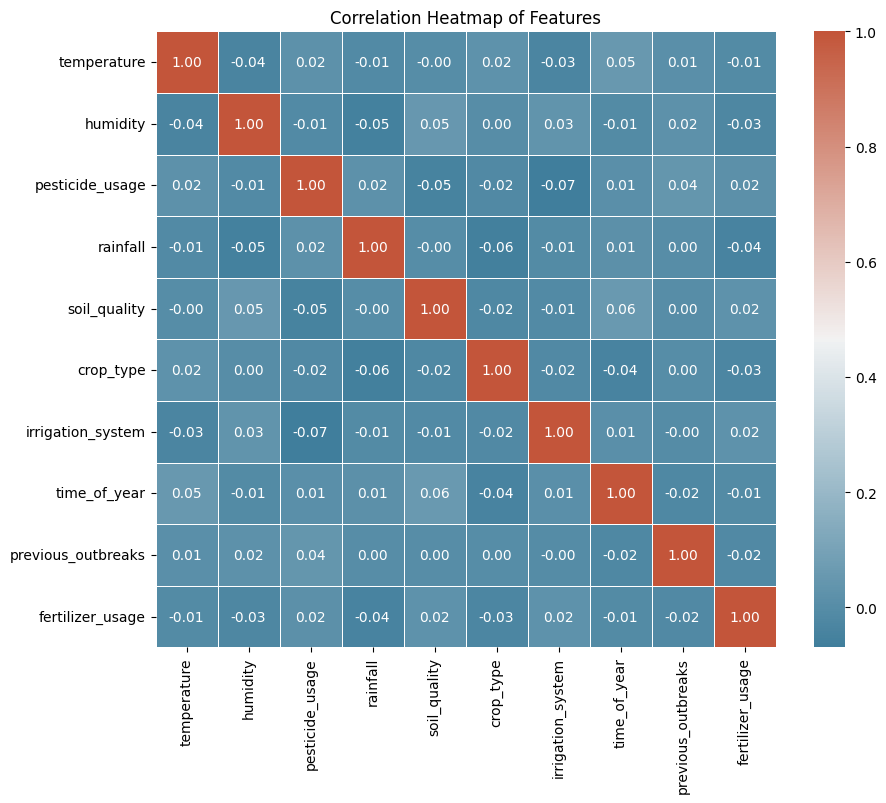

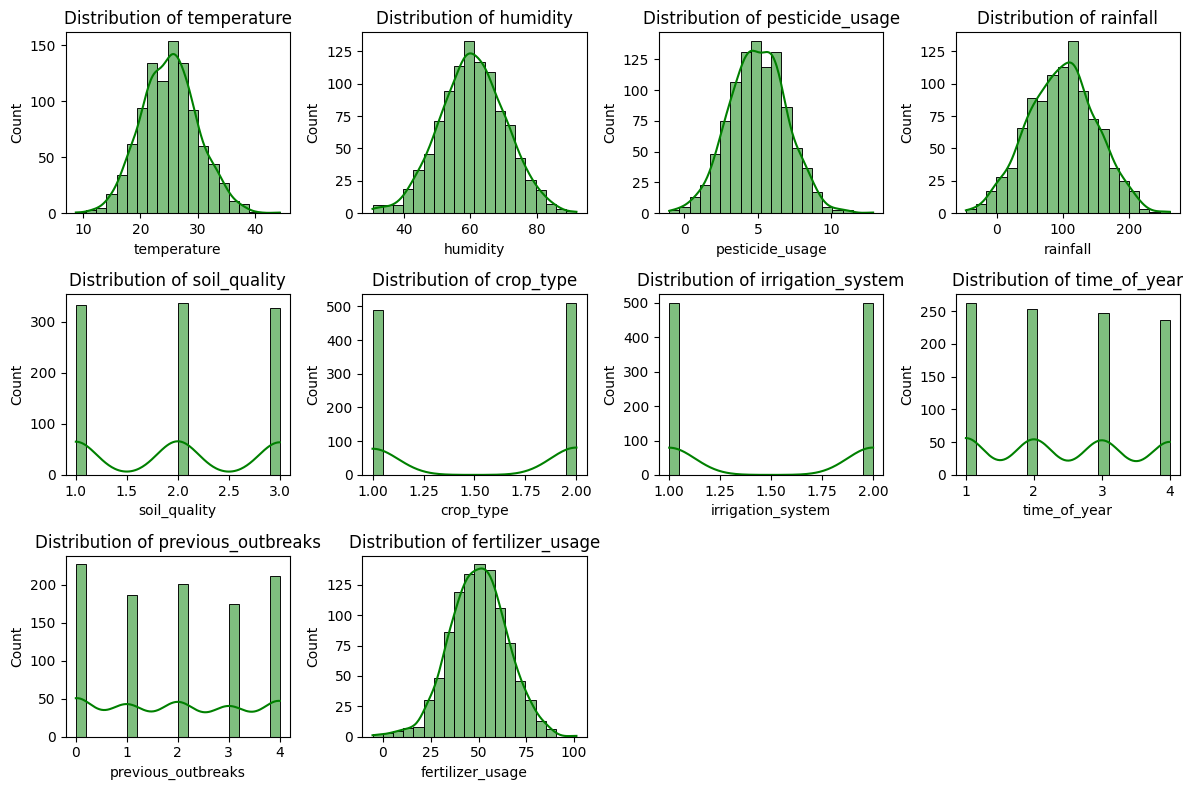

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate ideal dataset with controlled relationships
def generate_data(n=100, noise_level=2):
    # Simulate features with controlled relationships
    temperature = np.random.normal(25, 5, n)
    humidity = np.random.normal(60, 10, n)
    pesticide_usage = np.random.normal(5, 2, n)
    rainfall = np.random.normal(100, 50, n)
    soil_quality = np.random.choice([1, 2, 3], size=n)
    crop_type = np.random.choice([1, 2], size=n)
    irrigation_system = np.random.choice([1, 2], size=n)
    time_of_year = np.random.choice([1, 2, 3, 4], size=n)
    previous_outbreaks = np.random.randint(0, 5, n)
    fertilizer_usage = np.random.normal(50, 15, n)

    # Generate target variable y
    y = (0.05 * temperature - 0.02 * humidity + 0.1 * pesticide_usage + 
         0.03 * rainfall + 0.2 * soil_quality + 0.1 * crop_type +
         0.05 * irrigation_system + 0.03 * time_of_year + 
         0.2 * previous_outbreaks + 0.1 * fertilizer_usage + 
         np.random.normal(0, noise_level, n))  # Adding noise
    
    # Create DataFrame for features
    X = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'pesticide_usage': pesticide_usage,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'crop_type': crop_type,
        'irrigation_system': irrigation_system,
        'time_of_year': time_of_year,
        'previous_outbreaks': previous_outbreaks,
        'fertilizer_usage': fertilizer_usage
    })

    # Debugging: Print out the shapes of X and y
    print(f"Generated X shape: {X.shape}, y length: {len(y)}")
    
    # Check explicitly if the lengths match
    if X.shape[0] != len(y):
        print(f"Error: Mismatch! X has {X.shape[0]} rows, but y has {len(y)} values.")
    else:
        print("Data Generation: X and y lengths match!")

    return X, y

# Data splitting, scaling, and pipeline setup
def preprocess_data(X, y):
    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # StandardScaler for feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
    ])
    
    return pipeline, X_train, X_test, y_train, y_test

# Model training, evaluation, and hyperparameter tuning using GridSearchCV
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type='ridge', param_grid=None):
    # Choose model dynamically based on user input
    if model_type == 'ridge':
        model = Ridge()
    elif model_type == 'lasso':
        model = Lasso()
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError(f"Model {model_type} not recognized.")
    
    # If no param_grid is provided, use default
    if param_grid is None:
        param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and trained model
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha'] if model_type in ['ridge', 'lasso'] else None
    print(f"Best alpha: {best_alpha}" if best_alpha else "Best model found.")
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    return best_model, y_pred

# Advanced Visualizations with best color palettes
def plot_results(X, y, y_pred, model, plot_types=None):
    if plot_types is None:
        plot_types = ['correlation', 'distribution', 'residuals', 'prediction', 'error_histogram', 'coefficients', 'scatter']
    
    # Custom color palettes
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  # for heatmap
    color = sns.color_palette("coolwarm", as_cmap=True)

    if 'correlation' in plot_types:
        # Correlation Heatmap: To understand relationships between features
        corr_matrix = X.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap of Features")
        plt.show()

    if 'distribution' in plot_types:
        # Feature Distribution: To see how each feature is distributed
        plt.figure(figsize=(12, 8))
        for i, feature in enumerate(X.columns):
            plt.subplot(3, 4, i+1)
            sns.histplot(X[feature], kde=True, color='green', bins=20)
            plt.title(f"Distribution of {feature}")
        plt.tight_layout()
        plt.show()

    if 'residuals' in plot_types:
        # Residuals Plot: To visualize the residuals of the predictions
        residuals = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals, color='purple')
        plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
        plt.title("Residuals Plot (Predicted vs Residuals)")
        plt.xlabel("Predicted Crop Yield")
        plt.ylabel("Residuals")
        plt.show()

    if 'prediction' in plot_types:
        # Prediction vs True Plot: To compare predicted vs actual values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y, y=y_pred, color='blue')
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
        plt.title("Prediction vs True Crop Yield")
        plt.xlabel("Actual Crop Yield")
        plt.ylabel("Predicted Crop Yield")
        plt.show()

    if 'error_histogram' in plot_types:
        # Error Distribution Plot: Shows the spread of errors
        errors = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.histplot(errors, kde=True, color='red', bins=30)
        plt.title("Distribution of Prediction Errors")
        plt.xlabel("Error")
        plt.ylabel("Frequency")
        plt.show()

    if 'coefficients' in plot_types:
        # Coefficients Plot: Shows the feature importance for linear models
        coef = model.coef_
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X.columns, y=coef, palette="viridis")
        plt.title("Feature Importance (Model Coefficients)")
        plt.ylabel("Coefficient Value")
        plt.xticks(rotation=45)
        plt.show()

# Main function to execute the process
def main(model_type='ridge', n_samples=100, noise_level=2, plot_types=None):
    # Step 1: Generate ideal dataset
    X, y = generate_data(n=n_samples, noise_level=noise_level)  # Customizable samples and noise
    
    # Step 2: Preprocess data and set up the model pipeline
    pipeline, X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Step 3: Train and evaluate model
    param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Modify for Lasso/Ridge hyperparameters
    model, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test, model_type=model_type, param_grid=param_grid)
    
    # Step 4: Visualizations
    plot_results(X, y, y_pred, model, plot_types=plot_types)

# Execute the main function with dynamic parameters
if __name__ == '__main__':
    main(model_type='ridge', n_samples=1000, noise_level=3, plot_types=['correlation', 'prediction', 'distribution', 'error_histogram', 'coefficients'])


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate ideal dataset with more controlled relationships
def generate_data(n=100):
    # Simulate features with controlled relationships
    temperature = np.random.normal(25, 5, n)
    humidity = np.random.normal(60, 10, n)
    pesticide_usage = np.random.normal(5, 2, n)
    rainfall = np.random.normal(100, 50, n)
    soil_quality = np.random.choice([1, 2, 3], size=n)
    crop_type = np.random.choice([1, 2], size=n)
    irrigation_system = np.random.choice([1, 2], size=n)
    time_of_year = np.random.choice([1, 2, 3, 4], size=n)
    previous_outbreaks = np.random.randint(0, 5, n)
    fertilizer_usage = np.random.normal(50, 15, n)

    # Target variable with true relationships and added noise
    y = (0.05 * temperature - 0.02 * humidity + 0.1 * pesticide_usage + 
         0.03 * rainfall + 0.2 * soil_quality + 0.1 * crop_type +
         0.05 * irrigation_system + 0.03 * time_of_year + 
         0.2 * previous_outbreaks + 0.1 * fertilizer_usage + 
         np.random.normal(0, 2, n))  # Adding noise

    # Creating DataFrame for features
    X = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'pesticide_usage': pesticide_usage,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'crop_type': crop_type,
        'irrigation_system': irrigation_system,
        'time_of_year': time_of_year,
        'previous_outbreaks': previous_outbreaks,
        'fertilizer_usage': fertilizer_usage
    })
    return X, y

# Data splitting, scaling, and pipeline setup
def preprocess_data(X, y):
    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # StandardScaler for feature scaling and Ridge Regression
    pipeline = Pipeline([ 
        ('scaler', StandardScaler()),  # Standardizing the data
        ('model', Ridge())  # Default Ridge Regression model
    ])
    
    return pipeline, X_train, X_test, y_train, y_test

# Model training, evaluation, and hyperparameter tuning using GridSearchCV
def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Hyperparameter tuning using GridSearchCV for Ridge Regression
    param_grid = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
    grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and trained model
    best_alpha = grid_search.best_params_['model__alpha']
    print(f"Best alpha: {best_alpha}")
    model = grid_search.best_estimator_
    
    # Predictions and evaluation
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return model, y_pred

# Advanced Visualizations: 
def plot_results(X, y, y_pred, model):
    # 1. Correlation Heatmap: To understand relationships between features
    corr_matrix = X.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap of Features")
    plt.show()

    # 2. Feature Distribution: To see how each feature is distributed
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(X.columns):
        plt.subplot(3, 4, i+1)
        sns.histplot(X[feature], kde=True, color='green', bins=20)
        plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.show()

    # 3. Residuals Plot: To visualize the residuals of the predictions
    residuals = y_pred - y
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='purple')
    plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
    plt.title("Residuals Plot (Predicted vs Residuals)")
    plt.xlabel("Predicted Disease Outbreaks")
    plt.ylabel("Residuals")
    plt.show()

    # 4. Prediction vs True Plot: To compare predicted vs actual values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y, y=y_pred, color='blue')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
    plt.title("Prediction vs True Disease Outbreaks")
    plt.xlabel("Actual Disease Outbreaks")
    plt.ylabel("Predicted Disease Outbreaks")
    plt.show()

    # 5. Error Distribution Plot: Distribution of prediction errors
    error = y_pred - y
    plt.figure(figsize=(10, 6))
    sns.histplot(error, kde=True, color='orange')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error (Predicted - Actual)")
    plt.show()

    # 6. Cumulative Distribution Function (CDF): For actual values
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(y, color='blue')
    plt.title("Cumulative Distribution of Disease Outbreaks")
    plt.xlabel("Disease Outbreaks")
    plt.ylabel("CDF")
    plt.show()

    # 7. Boxplot by Soil Quality: Compare outbreaks across soil quality groups
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X['soil_quality'], y=y, palette='coolwarm')
    plt.title("Disease Outbreaks by Soil Quality")
    plt.show()

    # 8. Pairplot for Multiple Features: Explore pairwise relationships of selected features
    sns.pairplot(X[['temperature', 'humidity', 'rainfall', 'fertilizer_usage']])
    plt.title("Pairplot for Selected Features")
    plt.show()

    # 9. Cumulative Sum of Predictions: To see trends in predictions
    cumulative_predictions = np.cumsum(y_pred)
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_predictions, color='purple')
    plt.title("Cumulative Sum of Disease Outbreak Predictions")
    plt.xlabel("Samples")
    plt.ylabel("Cumulative Predictions")
    plt.show()

    # 10. Coefficient Distribution: To explore the coefficients from Ridge Regression
    coef = model.named_steps['model'].coef_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=X.columns, y=coef)
    plt.title("Distribution of Coefficients in Ridge Model")
    plt.xticks(rotation=45)
    plt.show()

# Main function to execute the process
def main():
    # Step 1: Generate ideal dataset
    X, y = generate_data(n=100)  # 100 samples
    
    # Step 2: Preprocess data and set up the model pipeline
    pipeline, X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Step 3: Train and evaluate model
    model, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test)
    
    # Step 4: Visualizations
    plot_results(X, y, y_pred, model)

# Execute the main function
if __name__ == '__main__':
    main()


ValueError: Invalid parameter 'model' for estimator Ridge(). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'random_state', 'solver', 'tol'].

Best alpha: 100.0
Mean Absolute Error (MAE): 1.77
R² Score: 0.47
Mean Squared Error (MSE): 4.75


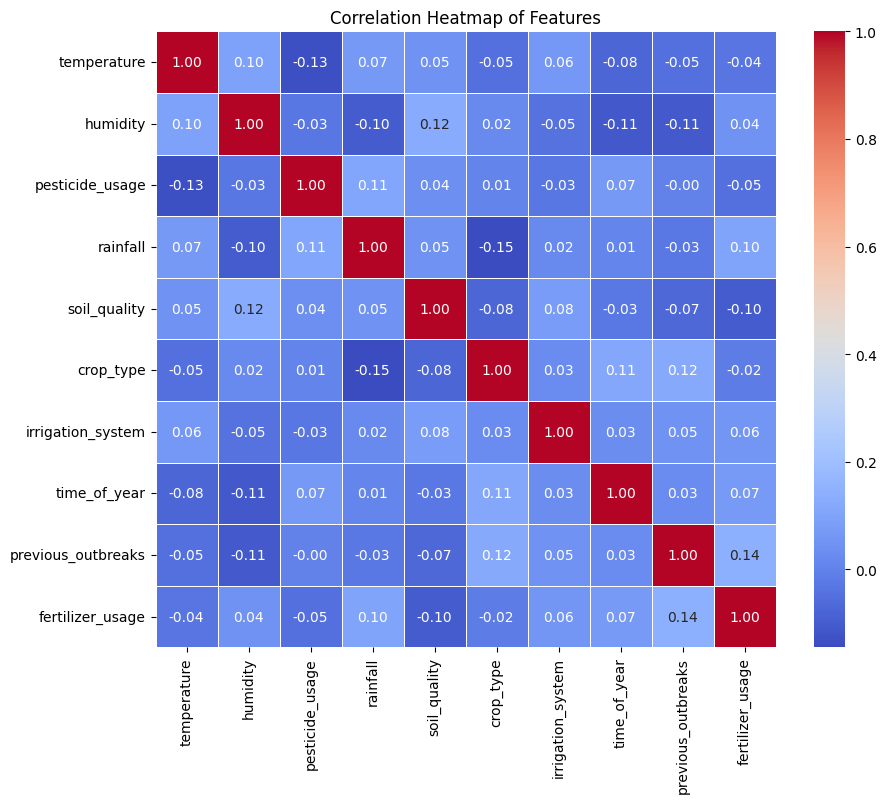

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate ideal dataset with more controlled relationships
def generate_data(n=100, noise_level=2):
    # Simulate features with controlled relationships
    temperature = np.random.normal(25, 5, n)
    humidity = np.random.normal(60, 10, n)
    pesticide_usage = np.random.normal(5, 2, n)
    rainfall = np.random.normal(100, 50, n)
    soil_quality = np.random.choice([1, 2, 3], size=n)
    crop_type = np.random.choice([1, 2], size=n)
    irrigation_system = np.random.choice([1, 2], size=n)
    time_of_year = np.random.choice([1, 2, 3, 4], size=n)
    previous_outbreaks = np.random.randint(0, 5, n)
    fertilizer_usage = np.random.normal(50, 15, n)

    # Target variable with true relationships and added noise
    y = (0.05 * temperature - 0.02 * humidity + 0.1 * pesticide_usage + 
         0.03 * rainfall + 0.2 * soil_quality + 0.1 * crop_type +
         0.05 * irrigation_system + 0.03 * time_of_year + 
         0.2 * previous_outbreaks + 0.1 * fertilizer_usage + 
         np.random.normal(0, noise_level, n))  # Adding noise

    # Creating DataFrame for features
    X = pd.DataFrame({
        'temperature': temperature,
        'humidity': humidity,
        'pesticide_usage': pesticide_usage,
        'rainfall': rainfall,
        'soil_quality': soil_quality,
        'crop_type': crop_type,
        'irrigation_system': irrigation_system,
        'time_of_year': time_of_year,
        'previous_outbreaks': previous_outbreaks,
        'fertilizer_usage': fertilizer_usage
    })
    return X, y

# Data splitting, scaling, and pipeline setup
def preprocess_data(X, y):
    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # StandardScaler for feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
    ])
    
    return pipeline, X_train, X_test, y_train, y_test

# Model training, evaluation, and hyperparameter tuning using GridSearchCV
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type='ridge', param_grid=None):
    # Choose model dynamically based on user input
    if model_type == 'ridge':
        model = Ridge()
    elif model_type == 'lasso':
        model = Lasso()
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError(f"Model {model_type} not recognized.")
    
    # If no param_grid is provided, use default
    if param_grid is None:
        param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and trained model
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha'] if model_type in ['ridge', 'lasso'] else None
    print(f"Best alpha: {best_alpha}" if best_alpha else "Best model found.")
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    return best_model, y_pred

# Advanced Visualizations
def plot_results(X, y, y_pred, model, plot_types=None):
    if plot_types is None:
        plot_types = ['correlation', 'distribution', 'residuals', 'prediction']
    
    if 'correlation' in plot_types:
        # Correlation Heatmap: To understand relationships between features
        corr_matrix = X.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap of Features")
        plt.show()

    if 'distribution' in plot_types:
        # Feature Distribution: To see how each feature is distributed
        plt.figure(figsize=(12, 8))
        for i, feature in enumerate(X.columns):
            plt.subplot(3, 4, i+1)
            sns.histplot(X[feature], kde=True, color='green', bins=20)
            plt.title(f"Distribution of {feature}")
        plt.tight_layout()
        plt.show()

    if 'residuals' in plot_types:
        # Residuals Plot: To visualize the residuals of the predictions
        residuals = y_pred - y
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_pred, y=residuals, color='purple')
        plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
        plt.title("Residuals Plot (Predicted vs Residuals)")
        plt.xlabel("Predicted Disease Outbreaks")
        plt.ylabel("Residuals")
        plt.show()

    if 'prediction' in plot_types:
        # Prediction vs True Plot: To compare predicted vs actual values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y, y=y_pred, color='blue')
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
        plt.title("Prediction vs True Disease Outbreaks")
        plt.xlabel("Actual Disease Outbreaks")
        plt.ylabel("Predicted Disease Outbreaks")
        plt.show()

# Add the interpretation summary dynamically
def interpret_results(mae, r2, model, X, y, y_pred, plot_types):
    print("\nInterpretation Summary:")
    
    # Model Evaluation
    print(f"\nModel Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    if isinstance(model, Pipeline):
        feature_importance = model.named_steps['ridge'].coef_ if 'ridge' in model.named_steps else None
        if feature_importance is not None:
            print("\nFeature Importance (Coefficients):")
            for feature, coef in zip(X.columns, feature_importance):
                print(f"{feature}: {coef:.2f}")
    
    # Visual Insights
    print("\nVisual Insights:")
    if 'correlation' in plot_types:
        print("1. Correlation Heatmap: Identifies relationships between features.")
    if 'distribution' in plot_types:
        print("2. Feature Distribution: Reveals how each feature is distributed.")
    if 'residuals' in plot_types:
        print("3. Residuals Plot: Helps check if model errors are random.")
    if 'prediction' in plot_types:
        print("4. Prediction vs Actual Plot: Shows the accuracy of model predictions.")
    
    # Final Summary
    print("\nSuggested Next Steps:")
    print("1. Explore additional feature engineering to capture complex relationships.")
    print("2. Experiment with other regression models or non-linear models for better performance.")
    print("3. Consider gathering more data for better generalization.")
    print("4. Validate assumptions, especially around key features like soil quality and previous outbreaks.")

# Main function to execute the process
def main(model_type='ridge', n_samples=100, noise_level=2, plot_types=None):
    # Step 1: Generate ideal dataset
    X, y = generate_data(n=n_samples, noise_level=noise_level)  # Customizable samples and noise
    
    # Step 2: Preprocess data and set up the model pipeline
    pipeline, X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Step 3: Train and evaluate model
    param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Modify for Lasso/Ridge hyperparameters
    model, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test, model_type=model_type, param_grid=param_grid)
    
    # Step 4: Visualizations
    plot_results(X, y, y_pred, model, plot_types=plot_types)
    
    # Step 5: Interpretation Summary
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    interpret_results(mae, r2, model, X, y, y_pred, plot_types)

# Execute the main function with dynamic parameters
if __name__ == '__main__':
    main(model_type='ridge', n_samples=200, noise_level=3, plot_types=['correlation', 'prediction'])
